# Основы EDA

Автор: **Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

Разведочный анализ данных (EDA) - анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Концепция EDA разработана американским математиком Джоном Тьюки еще в 1970-х годах, и до сих пор является важным этапом аналитических работа.

Джон Тьюки выделял следующие цели EDA:
- максимальное «проникновение» в данные,
- выявление основных структур,
- выбор наиболее важных переменных,
- обнаружение отклонений и аномалий,
- проверка основных гипотез,
- разработка начальных моделей.



In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/obulygin/content/main/car_insurance_data/car_insurance_data.csv")

Для примера будем использовать набор данных о клиентах автостраховой компании.

Целевая переменная 'outcome' - 1, если клиенту была выплачена страховка, иначе - 0.

Данные содержат следующий набор признаков про каждого клиента:

* 'id' - уникальный номер (id) клиента  
* 'age' - возрастная категория  
* 'gender' - пол  
* 'race' - раса  
* 'driving_experience' - опыт вождения  
* 'education' - образование    
* 'income' - уровень дохода  
* 'credit_score' - кредитный рейтинг  
* 'vehicle_ownership' - факт владения транспортным средством  
* 'vehicle_year' - год выпуска транспортного средства  
* 'married' - семейное положение  
* 'children' - наличие детей  
* 'postal_code' - почтовый индекс  
* 'annual_mileage' - годовой пробег  
* 'vehicle_type' - тип транспортного средства  
* 'speeding_violations' - количество случаев превышения скорости  
* 'DUIs' - количество случаев вождения в нетрезвом виде  
* 'past_accidents' - количество прошлых аварий

In [ ]:
df

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


Используя метод `info()`, мы можем получить больше информации о наборе данных, включая имена всех столбцов и соответствующие им типы данных, а также количество непропущенных значений.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

Итого, в датасете есть 10000 наблюдений и 19 колонок: целевая переменная ('outcome'), колонка с id каждого наблюдения ('id') и 17 признаков.




**[df.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)** - Выводит описательные статистики по числовым столбцам датафрейма. Описательные статистики включают в себя
- `count` - количество не пустых значений
- `mean` - среднее арифметическое
- `std` - стандартное отклонение
- `min`, `max` - минимум и максимум
- 25%, 50%, 75% - соотвествующие квартили  


Из статистик автоматически исключаются `NaN` значения, если они есть.

In [ ]:
df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


# Подготовка данных

## Работа с пропусками

Начнем с проверки набора данных на наличие пропусков. Для этого мы можем использовать метод `isna()`, который возвращает массив с булевыми значениями, указывающими, является ли значение пропуском или нет. Чтобы посчитать долю пропусков, применяем метод `mean()`.

In [ ]:
df.isna().mean() * 100

id                     0.00
age                    0.00
gender                 0.00
race                   0.00
driving_experience     0.00
education              0.00
income                 0.00
credit_score           9.82
vehicle_ownership      0.00
vehicle_year           0.00
married                0.00
children               0.00
postal_code            0.00
annual_mileage         9.57
vehicle_type           0.00
speeding_violations    0.00
DUIs                   0.00
past_accidents         0.00
outcome                0.00
dtype: float64

Обычно у нас есть три варианта обработки пропусков: ничего не делать, удалить строки с ними или попытаться восстановить пропуски.

Как часто в реальной жизни приходится заполнять пропуски?

На самом деле не часто. Заполнять нужно в том случае, когда алгоритм, для которого готовятся данные, чувствителен к пропускам. Например, регрессии и нейросети – чувствительны, а корреляция и стат-тесты нет (хотя для стат-тестов пропуски нужно удалять).

Кроме того, заполнять мы, строго говоря, имеем право только когда данные пропущены совершенно случайно (MCAR) – тогда заполнение не повлияет на характер связи междузаполняемой переменной и остальными. А то, что у нас MCAR нужно еще доказать.

Но это нужно уметь делать в тех случаях, когда необходимо.

Для заполнения отсутствующих значений существует много различных методов, и то, какой из них лучше всего подходит, обычно зависит от характеристик набора данных и от цели анализа. Один из самых простых методов заключается в замене пропущенных значений в каждом столбце расчетными статистиками.

Для принятия решения о том, что делать с пропусками, рассмотрим возможную взаимосвязь признака с другими.



In [ ]:
df.groupby("income")["credit_score"].median().sort_values()

income
poverty          0.349915
working class    0.431376
middle class     0.526747
upper class      0.616289
Name: credit_score, dtype: float64

Мы видим, что кредитный рейтинг отличается по уровням дохода, есть зависимосить.

In [ ]:
df["credit_score"].fillna(df.groupby("income")["credit_score"].transform('median'))

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: credit_score, Length: 10000, dtype: float64

In [ ]:
# df.isna().mean() * 100

Отличается ли пробег по позрасту?

In [ ]:
df.groupby("age")["annual_mileage"].median().sort_values()

age
40-64    11000.0
65+      11000.0
26-39    12000.0
16-25    13000.0
Name: annual_mileage, dtype: float64

In [ ]:
df["annual_mileage"].fillna(df.groupby("age")["annual_mileage"].transform('median'))

# df.isna().mean() * 100

## Исключение неиформатированных столбцов

Столбец "id" не важен для нашего анализа, поэтому мы можем избавиться от них с помощью метода `drop()`.

In [ ]:
df = df.drop(["id"], axis=1)

# Исследовательский анализ

## Однофакторный анализ

Однофакторный анализ – это самая простая форма анализа данных. Как следует из названия, он подразумевает расчёты в рамках одного столбца или переменной, в основном используется для описания данных.

Столбец gender относится к категориальным номинальным данным. Значения в данном столбце нет смысла ранжировать и сравнивать друг с другом. Мы можем получить количество каждой категории, используя метод `value_counts()`.

In [ ]:
df["gender"].value_counts(normalize=True)

gender
female    0.501
male      0.499
Name: proportion, dtype: float64

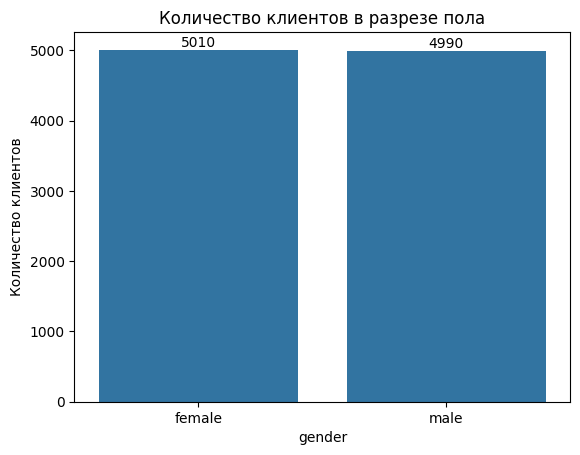

In [ ]:
ax = sns.countplot(data=df, x="gender")
ax.bar_label(ax.containers[0])
plt.title("Количество клиентов в разрезе пола")
plt.ylabel("Количество клиентов")
plt.show()

[Text(0, 0, '6867'), Text(0, 0, '3133')]

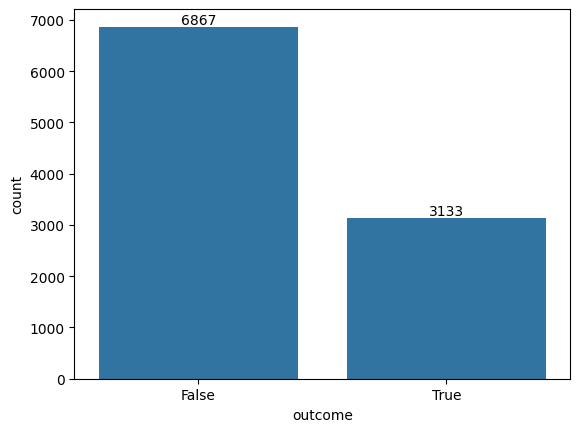

In [ ]:
ax = sns.countplot(x='outcome', data=df)
ax.bar_label(ax.containers[0])

Категориальные порядковые данные имеет смысл ранжировать, сравнивать значения друг с другом по принципу "больше-меньше". Образование и доход как раз к ним относятся.

income
upper class      0.4336
middle class     0.2138
poverty          0.1814
working class    0.1712
Name: proportion, dtype: float64

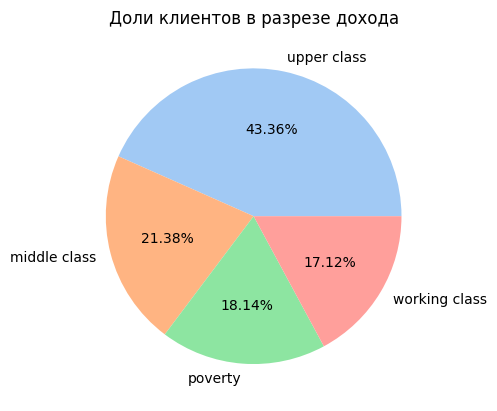

In [ ]:
# посчитаем доли клиентов в разрезе дохода
income = df["income"].value_counts(normalize=True)
display(income)

# зададим цветовую палитру
colors = sns.color_palette('pastel')
plt.pie(income, labels=income.index, colors=colors, autopct='%.2f%%')
plt.title("Доли клиентов в разрезе дохода")
plt.show()

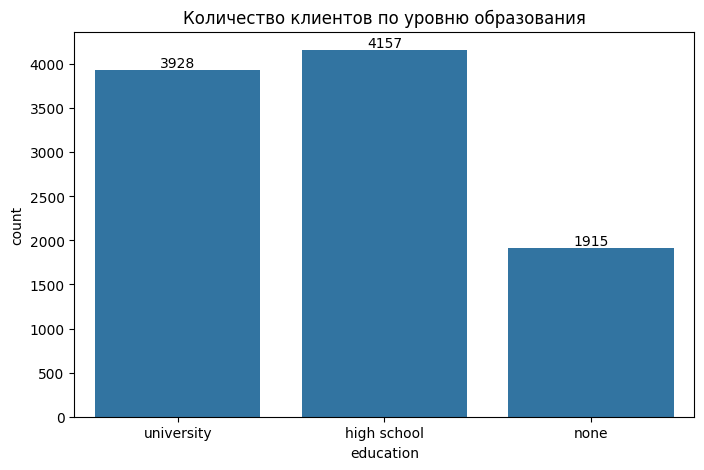

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="education", order=["university", "high school", "none"])
ax.bar_label(ax.containers[0])
plt.title("Количество клиентов по уровню образования")
plt.show()

Клиентов со средним образованием больше, чем в любой другой категории, за ними следуют выпускники университетов, а затем клиенты без образования.

Построим гистограмму для изучения распределения непрерывного признака credit_score.

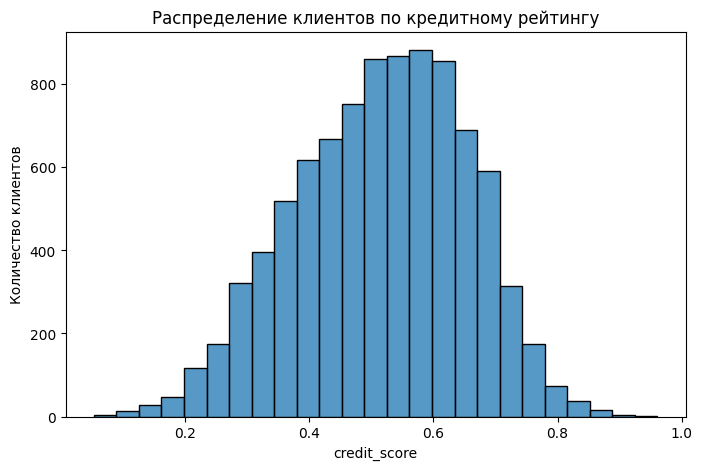

In [ ]:
plt.figure(figsize=[8, 5])
sns.histplot(data=df, x="credit_score", bins=25)
plt.title("Распределение клиентов по кредитному рейтингу")
plt.ylabel("Количество клиентов")
plt.show()

Распределение близко к нормальному. Изучим так же годовой пробег, добавив ядерную оценку плотности.

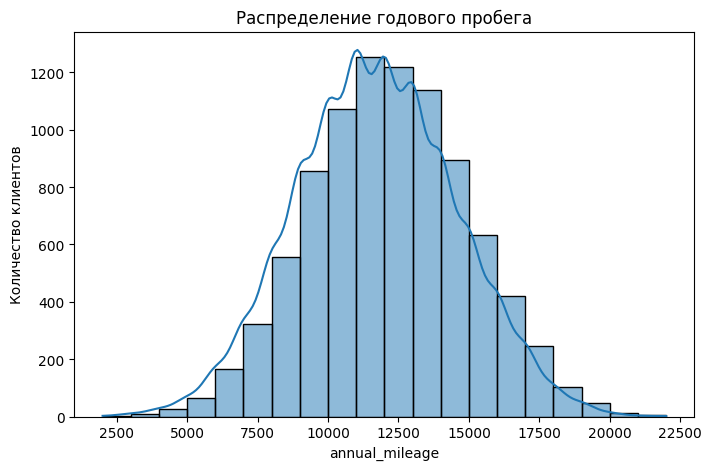

In [ ]:
plt.figure(figsize=[8, 5])
sns.histplot(data=df, x="annual_mileage", bins=20, kde=True)
plt.title("Распределение годового пробега")
plt.ylabel("Количество клиентов")
plt.show()

Тут аналогично распределение близкое к нормальному.

## Двухфакторный анализ

Он предполагает анализ двух признаков. Обычно это способ исследовать взаимосвязи между этими признаками и их влияние друг на друга. Можно изучать взаимосвязь двух числовых признаков, числового с категориальным и двух категориальных признаков, категориального с категориального.

Начнём с изучения взаимосвязи между категориальным столбцом и числовым. Это можно сделать через расчет среднего или медианы для каждого значения категориального столбца. Сначала мы группируем данные по "outcome", а затем вычисляем среднее значение годового пробега для каждой группы.

In [ ]:
df.groupby('outcome')['annual_mileage'].median()

outcome
False    11000.0
True     13000.0
Name: annual_mileage, dtype: float64

Но лучше смотреть и на визуализации:

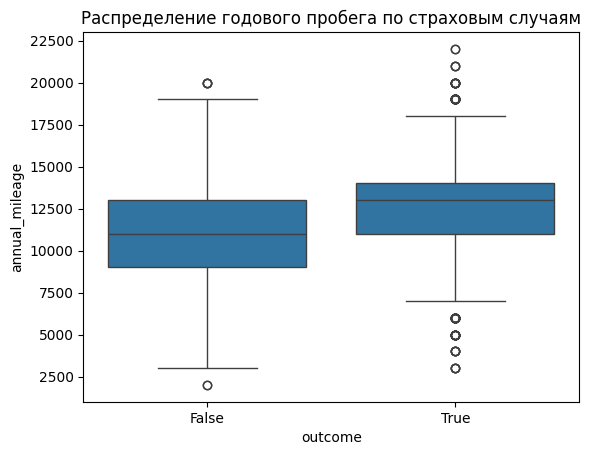

In [ ]:
sns.boxplot(data=df, x='outcome', y='annual_mileage')
plt.title("Распределение годового пробега по страховым случаям")
plt.show()

У клиентов со страховым случаем медианный годовой пробег несколько выше, чем у клиентов без страховых случаев. То же самое можно сказать о первом и третьем квартилях (обозначены нижней и верхней границами коробки соответственно).



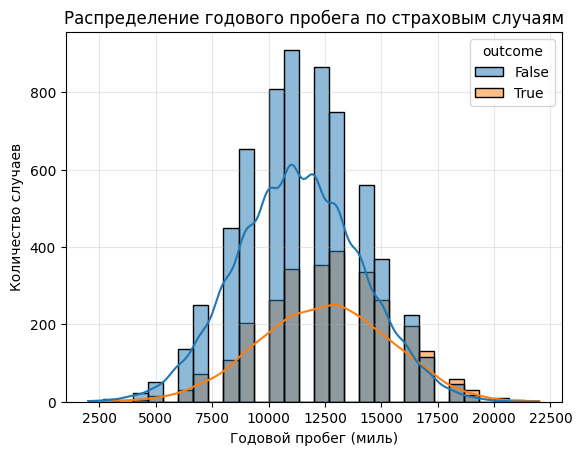

In [ ]:
sns.histplot(data=df, x="annual_mileage", hue="outcome", bins=30, kde=True)

plt.xlabel("Годовой пробег (миль)")
plt.ylabel("Количество случаев")
plt.title("Распределение годового пробега по страховым случаям")

plt.grid(True, alpha=0.3)

plt.show()

Пик распределения годового пробега автомобиля для клиентов с 'outcome' 0 в 11000, для 'OUTCOME' 1 в 13000. Кроме того, среди клиентов, которые больше ездят, растет доля выплаченных страховок.



Аналогичным образом мы можем сравнить распределения кредитного рейтинга по outcome.

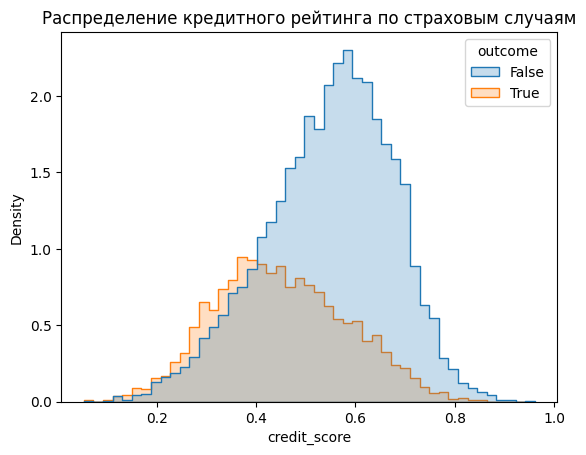

In [ ]:
sns.histplot(df, x="credit_score", hue="outcome", element="step", stat="density")
plt.title("Распределение кредитного рейтинга по страховым случаям")
plt.show()

Среди тех, кто не имеет ни одного нарушения скорости, примерно половине приходится выплачивать страховки. При этом, по тем кто имеет нарушения, доля выплат падает.



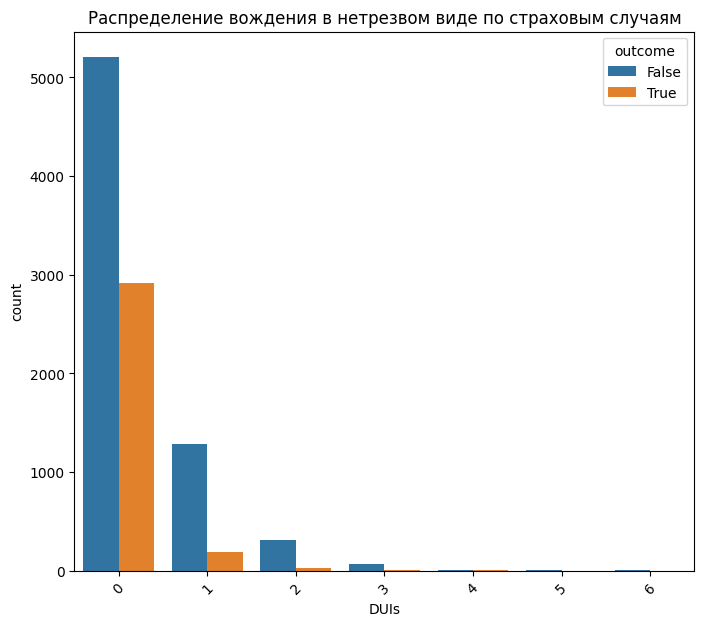

In [ ]:
plt.figure(figsize=[8, 7])
sns.countplot(data=df, x="DUIs", hue="outcome")
plt.title("Распределение вождения в нетрезвом виде по страховым случаям")
plt.xticks(rotation=45)
ax.grid(True, alpha=0.3)

plt.show()

Среди тех клиентов, кто не имеет случаев вождения в нетрезвом виде, наиболее большой процент тех, кому выплачивают страховки.



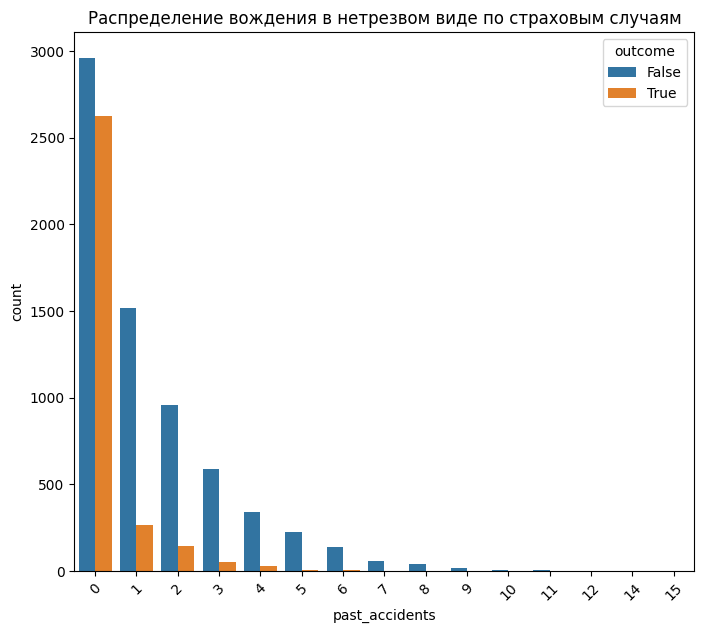

In [ ]:
plt.figure(figsize=[8, 7])
sns.countplot(data=df, x="past_accidents", hue="outcome")
plt.title("Распределение вождения в нетрезвом виде по страховым случаям")
plt.xticks(rotation=45)
ax.grid(True, alpha=0.3)

plt.show()


Среди тех клиентов, кто не имеет предыдущих несчастных случаев, наиболее большой процент тех, кому выплачивают страховки, равный почти 50%.



Теперь изучим категориальные признаки в разрезе outcome.

In [ ]:
def plot_category_by_outcome(data, column, order=None, location='best'):
    sns.countplot(x=column, hue='outcome', data=data, order=order)
    plt.title(f'{column} и Outcome')
    plt.legend(loc=location, title='outcome')
    plt.show()

Посмотрим, как распределяется количество случаев между различными возрастными категориями.

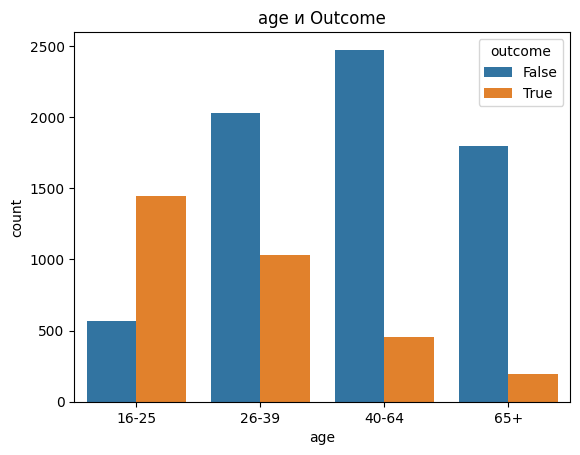

In [ ]:
plot_category_by_outcome(df, 'age', order=['16-25', '26-39', '40-64', '65+'])

Признак 'age' содержит 4 возрастные категории: '16-25', '26-39', '40-64', '65+'. Категории распределены довольно равномерно. Также видно нисходящий тренд в количестве выплаченных страховок с увеличением возрастной группы, то есть чем водитель старше, тем меньше вероятность, что ему потребуется выплачивать страховку. Также заметим, что в возрастной категории водителей от 16 до 25 лет соотношение тех кому пришлось выплатить страховку к тем кому она не была выплачена составляет примерно 3:1. То есть если в страховую компанию придет клиент в возрасте от 16 до 25 лет, то с вероятностью 75% нам придется выплачивать ему страховку.



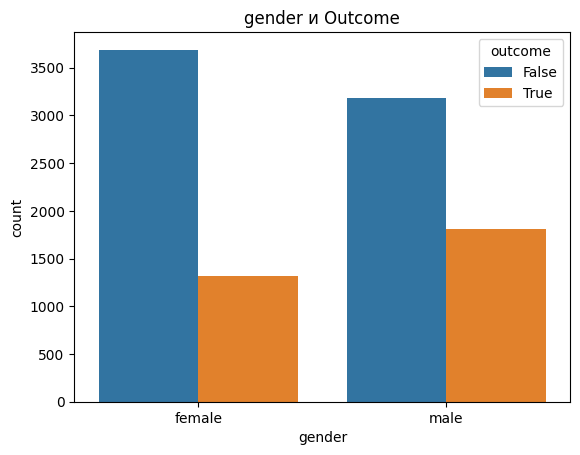

In [ ]:
plot_category_by_outcome(df, 'gender')

Видно, что по полу клиенты распределены равномерно, то есть женщины и мужчины берут автомобильную страховку одинаково часто. Кроме того, можно заметить интересный факт: мужчинам чаще приходится выплачивать страховку.



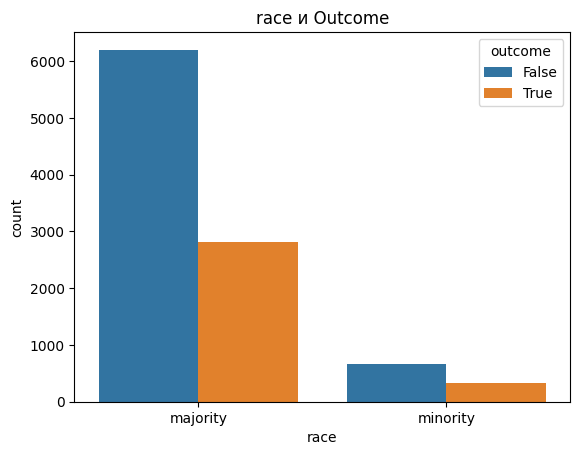

In [ ]:
plot_category_by_outcome(df, 'race')

В данных есть явный дисбаланс клиентов по расе: подавляющее большинство клиентов относится к мажоритарному классу. При этом, распределение количества выплаченных и невыплаченных страховок для обеих категорий примерно одинаково.



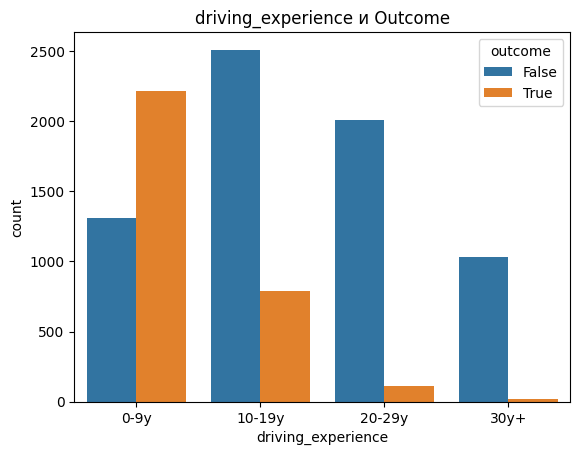

In [ ]:
plot_category_by_outcome(df, 'driving_experience')

Видно, что водителей со стажем больше 30 лет в выборке меньше всего, остальные группы распределены довольно равномерно. Также среди водителей со стажем больше 30 лет почти нет тех, кому приходится выплачивать страховку, и в целом наблюдается нисходящий тренд, что водителям с большим стажем реже приходится выплачивать страховку. Очень примечательна группа водителей со стажем меньше 9 лет, из которых больше чем половине приходится выплачивать страховку.



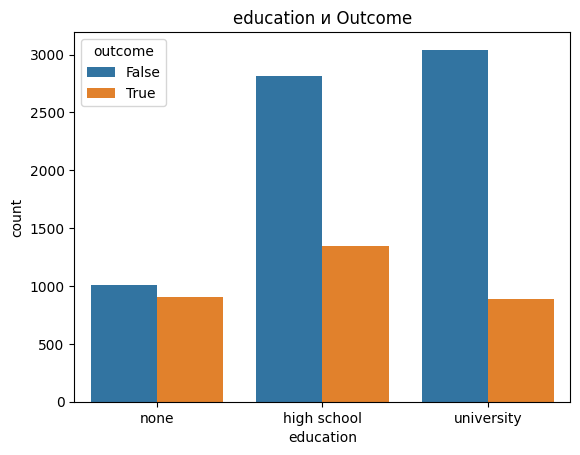

In [ ]:
plot_category_by_outcome(df, 'education', order=['none', 'high school', 'university'])

Видно, что видители с образованием 'high school' и 'university' берут страховку примерно одинаково часто, выплачивать страховку им также приходится одинаково часто.



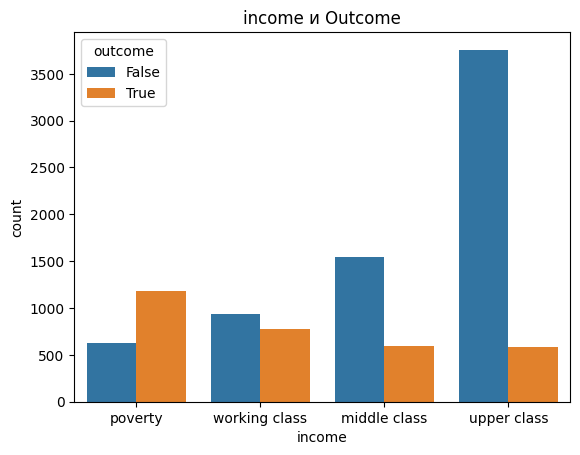

In [ ]:
plot_category_by_outcome(df, 'income', order=['poverty', 'working class', 'middle class', 'upper class'])

Видно, что количество клиентов с доходом 'upper class' примерно в 2 раза больше, чем клиентов любого другого типа доходов. При этом, остальные категории распределены довольно равномерно. Также видно, что количество выплат по страховкам уменьшается с уровнем дохода, а также клиентам с доходом категории 'working class' и 'poverty' гораздо чаще других приходится выплачивать страховку: в 'working class' примерно половине требуются выплаты по страховке, а в 'poverty' примерно двум третям.



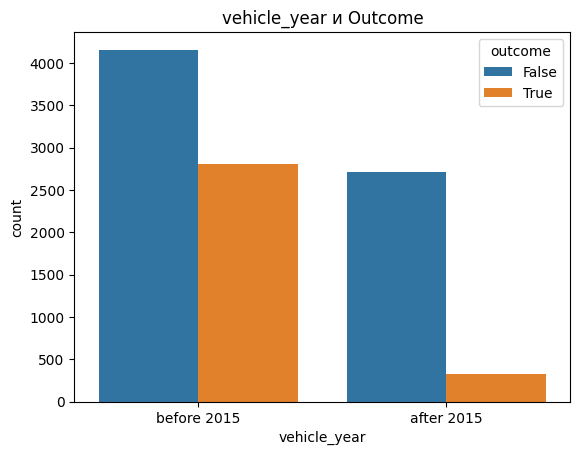

In [ ]:
plot_category_by_outcome(df, 'vehicle_year', order=['before 2015', 'after 2015'])

Большая часть автомобилей была выпущена до 2015 года, и процент выплат по страховкам для клиентов на таких автомобилях значительно выше, около 40%.



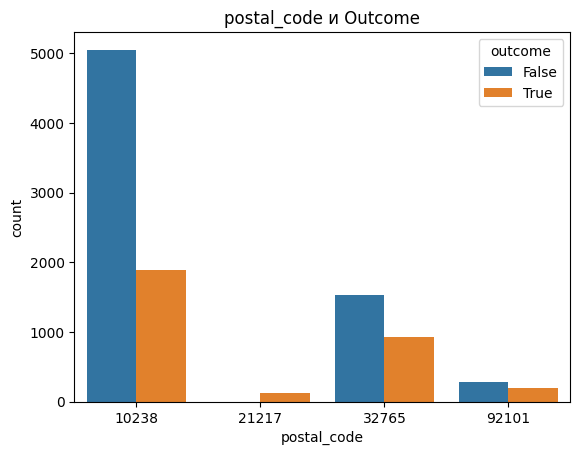

In [ ]:
plot_category_by_outcome(df, 'postal_code')

В данных присутствуют клиенты лишь с 4 регионов, что может говорить о нерепрезентативности выборки. Распределение численности клиентов в каждом регионе сильно неравномерное. В регионах 10238 и 3756 доля выплат по страховкам не очень большая, в регионе 92101 доля выплат почти 50%, а в регионе 21217 в 100% случаев понадобилась выплата по страховке.



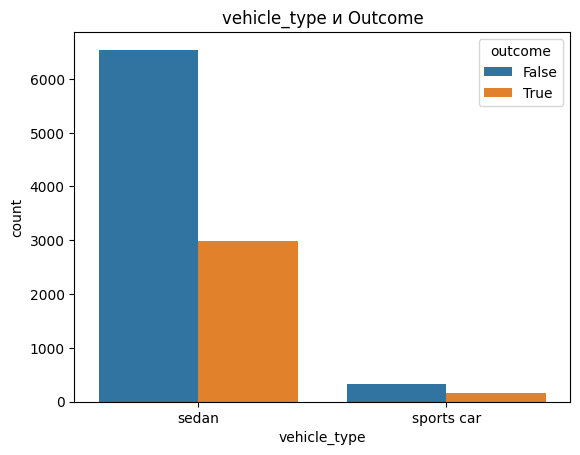

In [ ]:
plot_category_by_outcome(df, 'vehicle_type')

Большая часть автомобилей - седан, а процент выплат по страховкам для клиентов и седанов и спортивных машин примерно одинаковый.



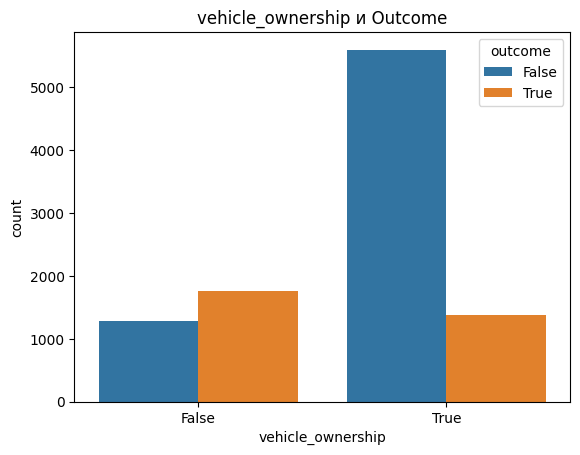

In [ ]:
plot_category_by_outcome(df, 'vehicle_ownership')

Владельцы собственных автомобилей чаще обращаются за страховкой, чем клиенты не являющиеся владельцами автомобиля, на который оформляется страховка. Также владельцам гораздо реже приходится выплачивать страховку, чем не владельцам, более чем половине из которых приходится выплачивать страховку.



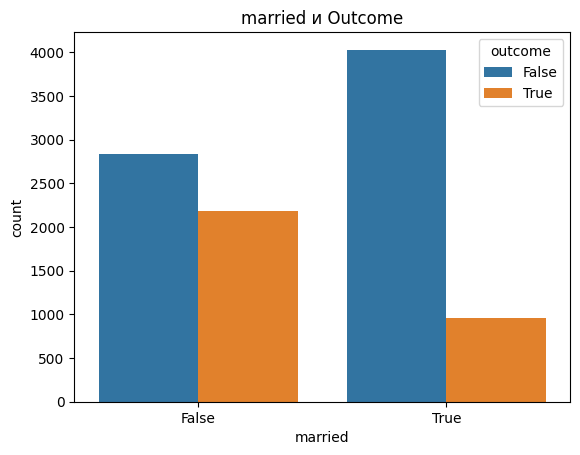

In [ ]:
plot_category_by_outcome(df, 'married')

В выборке одинаковое количество людей в браке и не в браке, при этом, клиентам, не состоящим в браке, приходится выплачивать страховку чаще.



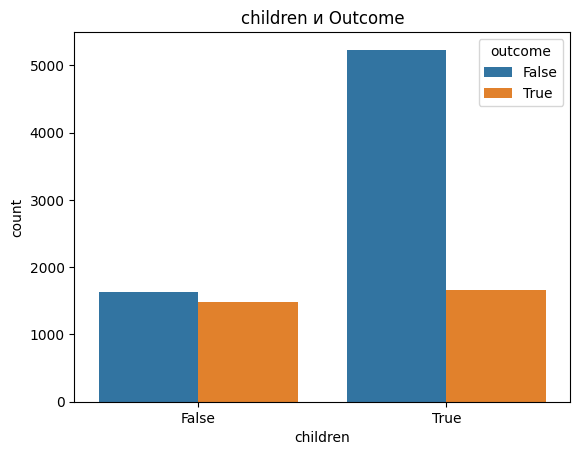

In [ ]:
plot_category_by_outcome(df, 'children')

В выборке большая часть клиентов имеет детей, при этом, клиентам, которые не имеют детей, приходится чаще выплачивать страховку, примерно в половине случаев.



Точечный график – хороший способ изучения взаимосвязи между двумя числовыми признаками. Исследуем взаимосвязь между "annual_mileage" и "speeding_violations".

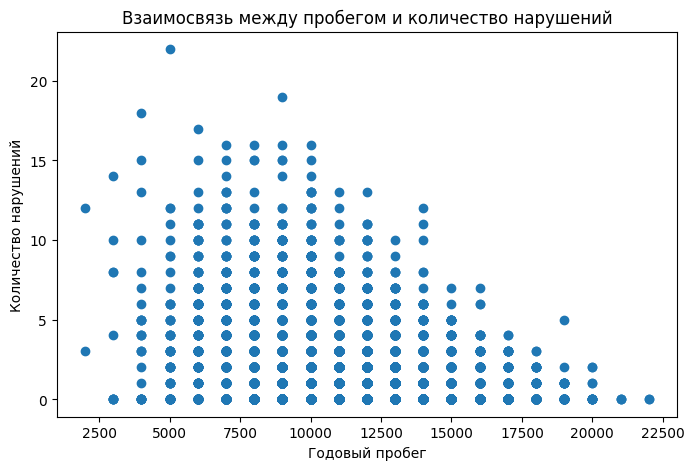

In [ ]:
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x="annual_mileage", y="speeding_violations")
plt.title("Взаимосвязь между пробегом и количество нарушений")
plt.ylabel("Количество нарушений")
plt.xlabel("Годовый пробег")
plt.show()

Можем предположить отрицательную взаимосвязь между пробегом и количество нарушений.



При помощи scatter plot matrix можно вывести сразу все взаимосвязи

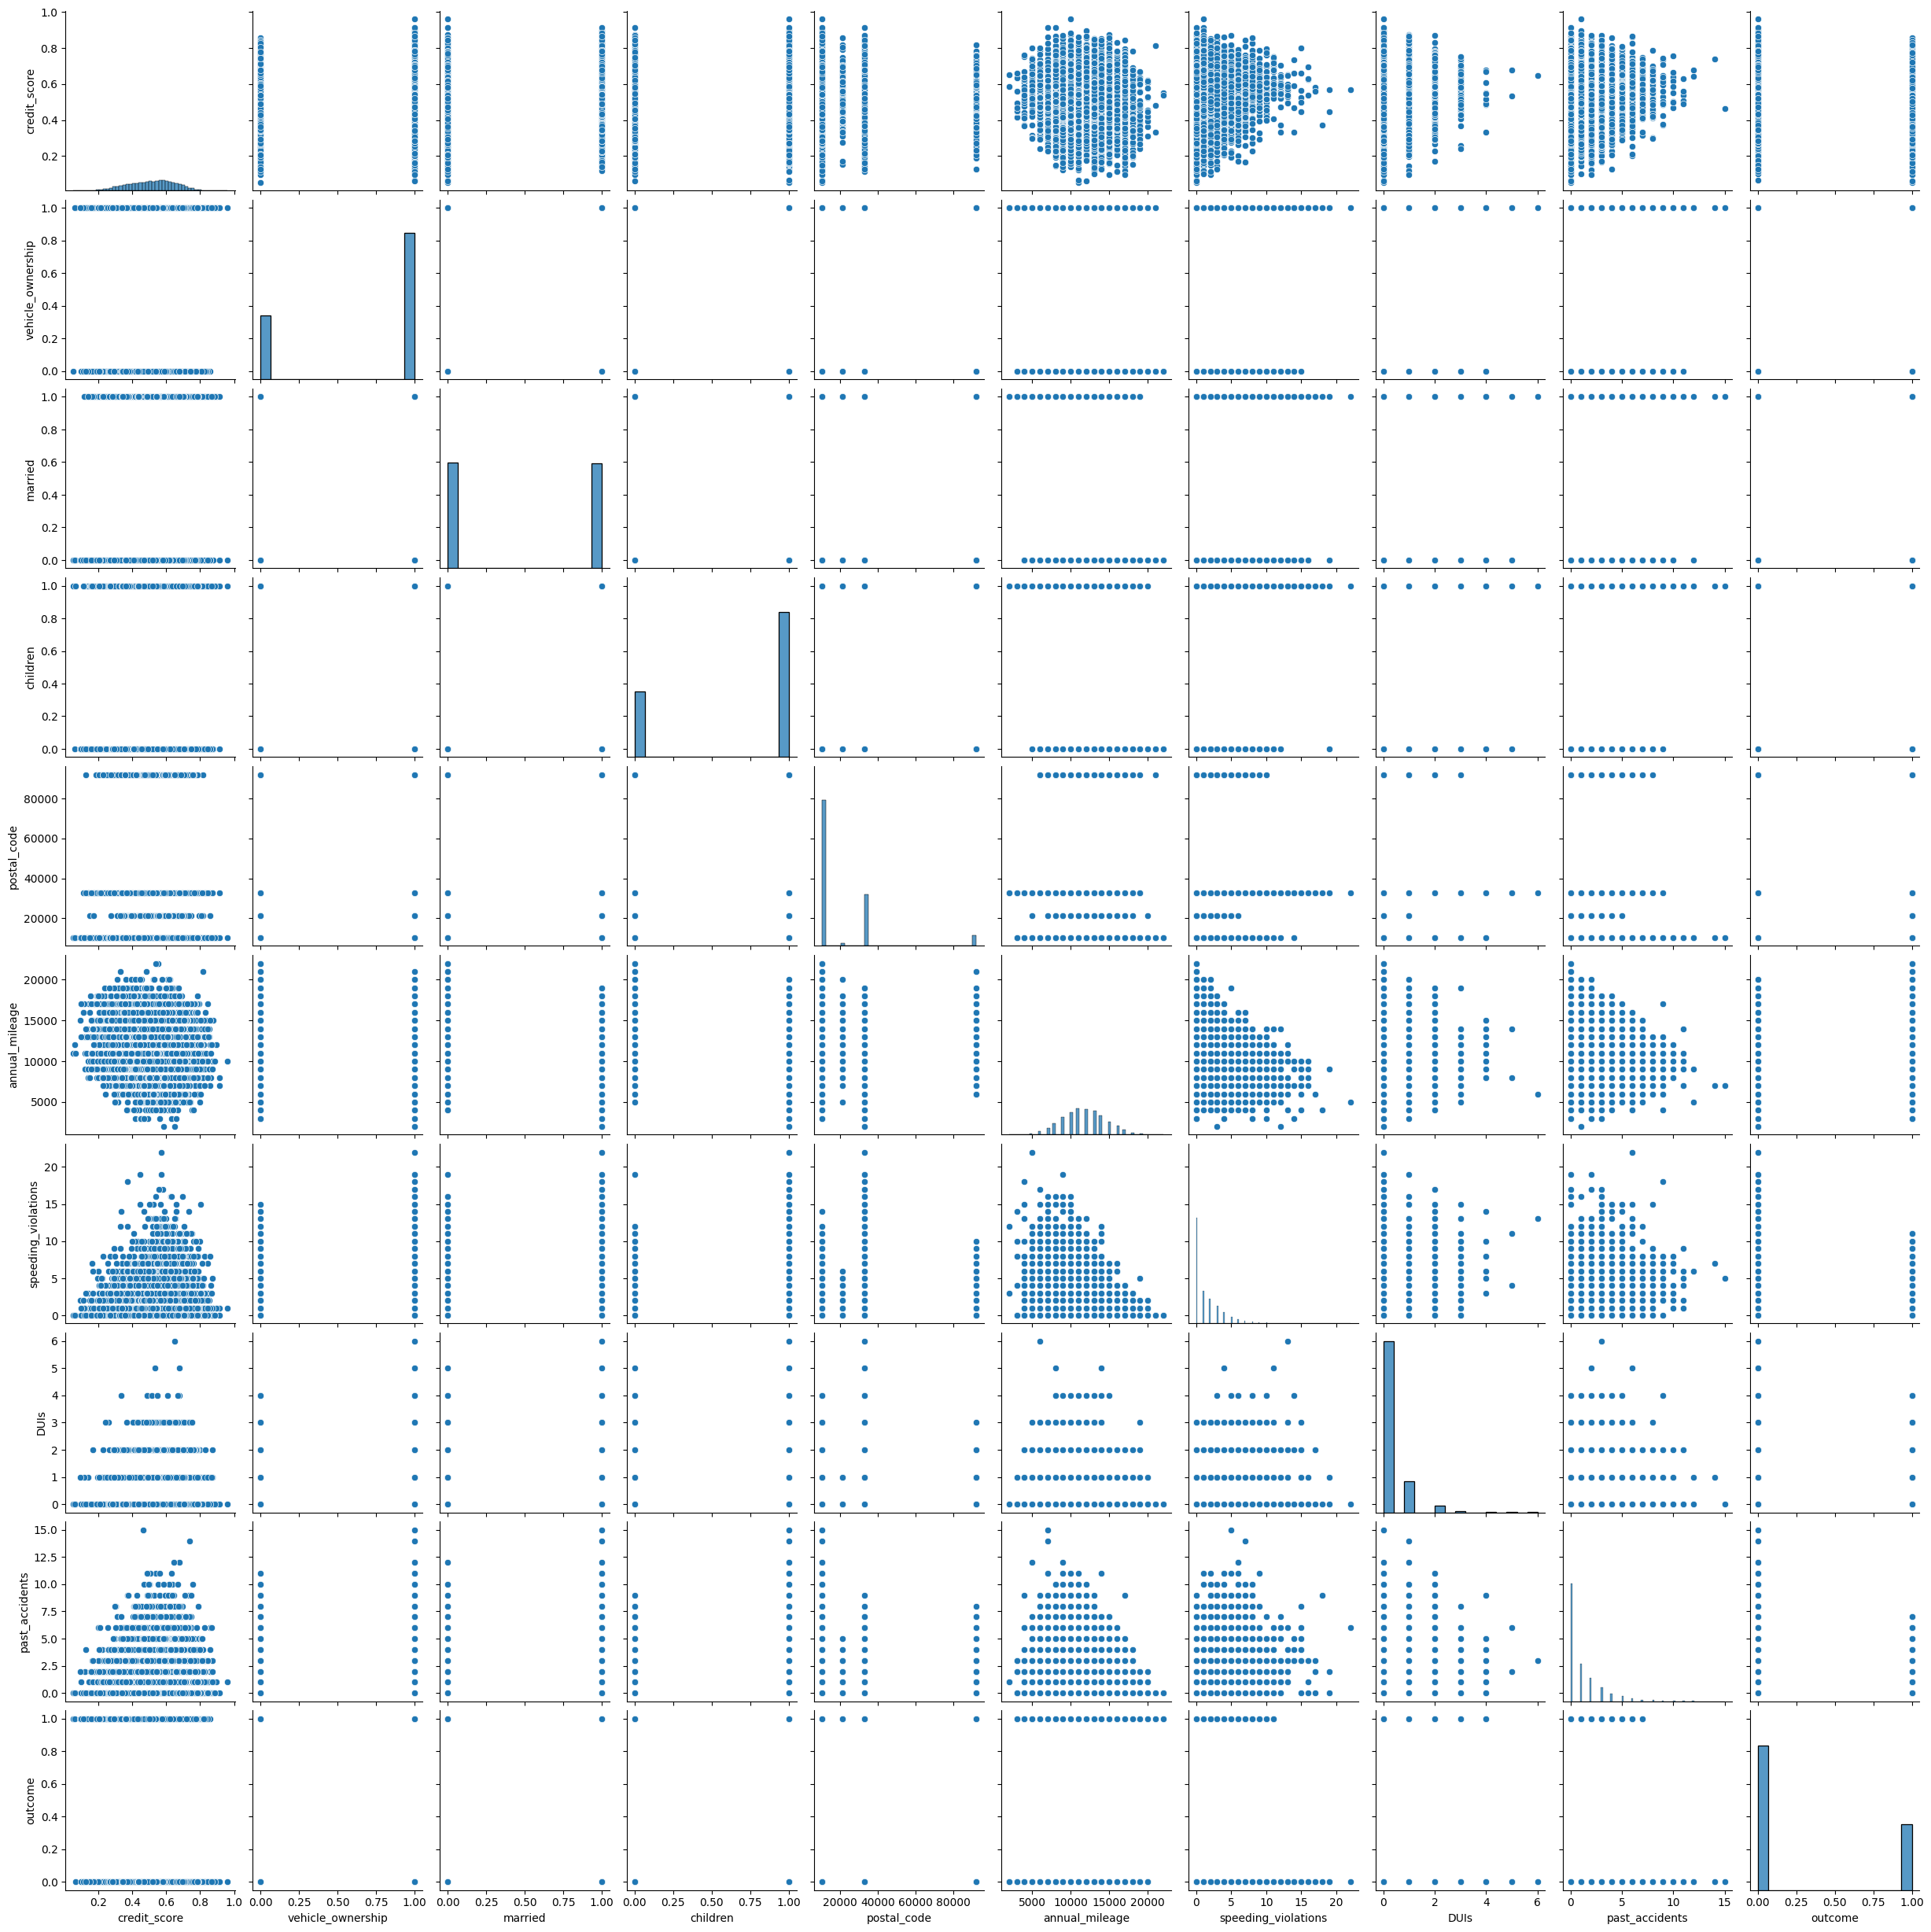

In [ ]:
sns.pairplot(data=df)
plt.show()

Можем построить и матрицу корреляций по всем столбцам :)

Для этого будем использовать phik-коэффициент.

Его достоинства:
- корректно работает с категориальными и непрерывными данными;
- фиксирует нелинейную зависимость;
- считает коэффициент корреляции Пирсона в случае если удовлятворяются его предпосылки к применения (нормальность распределения);
- имеет встроенный механизм подавления шума в данных, чтобы исключить статистические флуктуации.

Недостатки метода:

- вычислительно затратен;
- не показывает направление связи;
- если нужно вычислить взаимосвязи только по непрерывным данным, то другие коэффициенты могут быть более точны, особенно на малых выборках.


In [ ]:
!pip install phik

import phik
from phik.report import plot_correlation_matrix
from phik import report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
phik_overview = df.phik_matrix()
phik_overview

interval columns not set, guessing: ['credit_score', 'postal_code', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents']


,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
age,1.000000,0.000000,0.000000,0.938565,0.194176,0.772813,0.466168,0.409228,0.352403,0.562823,0.566249,0.020361,0.265364,0.020810,0.393501,0.249877,0.368732,0.680890
gender,0.000000,1.000000,0.000000,0.000000,0.054112,0.033897,0.107279,0.000000,0.004798,0.000000,0.000000,0.000000,0.000000,0.000000,0.263697,0.085657,0.223449,0.166557
race,0.000000,0.000000,1.000000,0.026066,0.071086,0.079890,0.048753,0.051639,0.028162,0.029471,0.000000,0.023586,0.000000,0.000000,0.000000,0.000000,0.018516,0.000000
driving_experience,0.938565,0.000000,0.026066,1.000000,0.135137,0.620276,0.330984,0.305093,0.247880,0.402161,0.414824,0.017662,0.177864,0.023833,0.529454,0.351234,0.501672,0.736730
education,0.194176,0.054112,0.071086,0.135137,1.000000,0.421333,0.442944,0.143775,0.122890,0.118311,0.074145,0.002693,0.145354,0.000000,0.139624,0.093422,0.180177,0.115244
income,0.772813,0.033897,0.079890,0.620276,0.421333,1.000000,0.677804,0.615957,0.536135,0.577349,0.433378,0.053916,0.254500,0.000000,0.264420,0.169390,0.240948,0.611977
credit_score,0.466168,0.107279,0.048753,0.330984,0.442944,0.677804,1.000000,0.418899,0.347375,0.373946,0.287940,0.000000,0.190742,0.025876,0.190458,0.103578,0.124969,0.427377
vehicle_ownership,0.409228,0.000000,0.051639,0.305093,0.143775,0.615957,0.418899,1.000000,0.245699,0.271640,0.195650,0.000000,0.132414,0.000000,0.153971,0.082872,0.107155,0.560230
vehicle_year,0.352403,0.004798,0.028162,0.247880,0.122890,0.536135,0.347375,0.245699,1.000000,0.201311,0.163385,0.000000,0.097920,0.035427,0.117250,0.051919,0.077134,0.445278
married,0.562823,0.000000,0.029471,0.402161,0.118311,0.577349,0.373946,0.271640,0.201311,1.000000,0.435184,0.000000,0.593323,0.000000,0.261660,0.116766,0.205716,0.399613


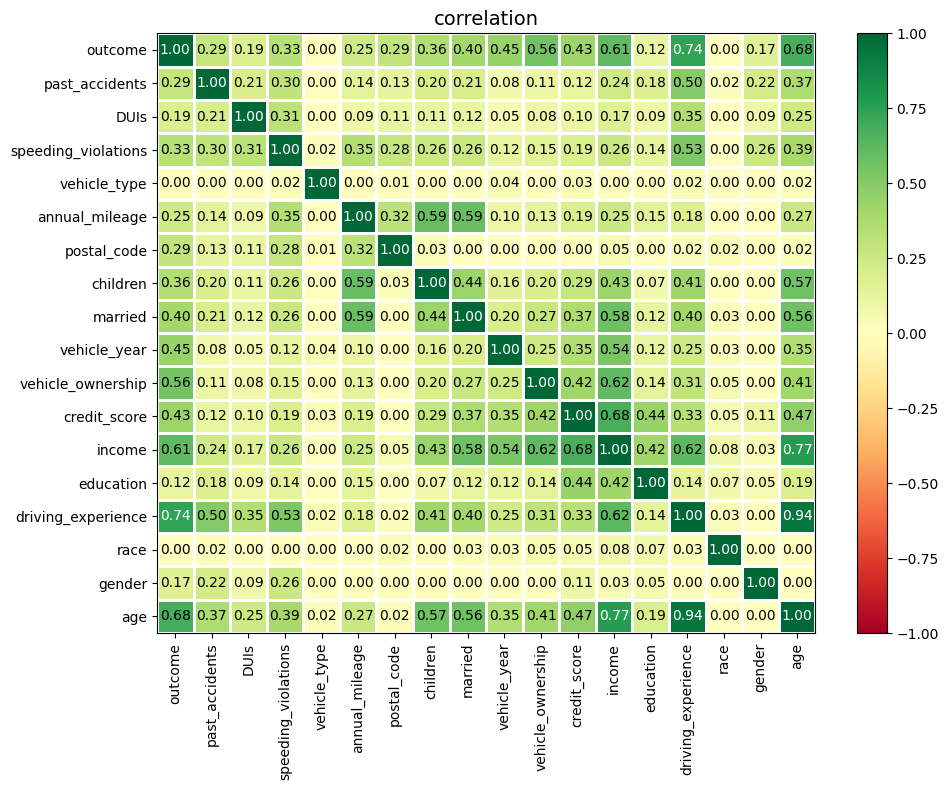

In [ ]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

## Многофакторный анализ

Такой анализ предполагает изучение взаимосвязи нескольких признаков. Часто для этого используется тепловые карты. Изучим взаимосвязь между образованием, доходом и количеством страховых случаев. Для этого сначала построим сводную таблицу.

In [ ]:
edu_income = pd.pivot_table(data=df, index='education', columns='income', values='outcome', aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


Далее передадим сводную таблицу в функцию `heatmap()`.

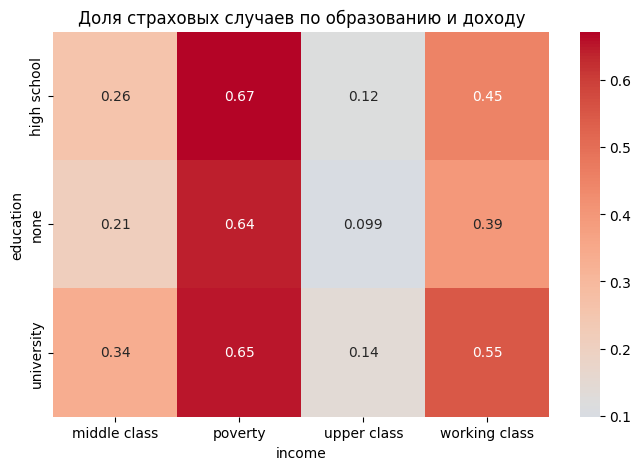

In [ ]:
plt.figure(figsize=[8, 5])
sns.heatmap(edu_income, annot=True, cmap='coolwarm',center=0.117)
plt.title("Доля страховых случаев по образованию и доходу")
plt.show()

Клиенты со средним образованием и низким доходом имеют самую большую долю страховых случаев. За ними следуют выпускники университетов с низким доходом. Клиенты с высоким доходом без образования имеют наименьшую долю страховых случаев.

То же самое сделаем для водительского стажа и семейного положения.

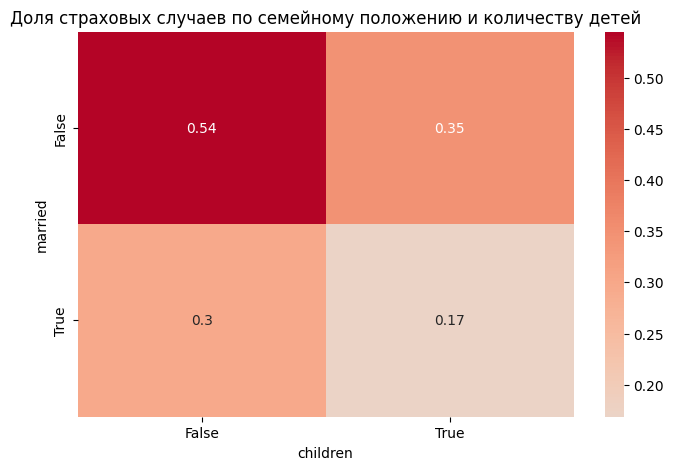

In [ ]:
driv_married = pd.pivot_table(data=df, index='married', columns='children', values='outcome', aggfunc='mean')

plt.figure(figsize=[8,5])
sns.heatmap(driv_married, annot=True, cmap='coolwarm', center=0.117)
plt.title("Доля страховых случаев по семейному положению и количеству детей")
plt.show()

Факт наличия брака оказывает более сильное влияние на аккуратное вождение и отсутствие выплат по страховке, чем факт наличия ребенка. Видно, что для женатых клиентов без детей 'outcome' статистически меньше, чем для неженатых клиентов с детьми.




Теперь построим тепловую карту для визуализации взаимосвязи пола, количества детей и количества страховых случаев.

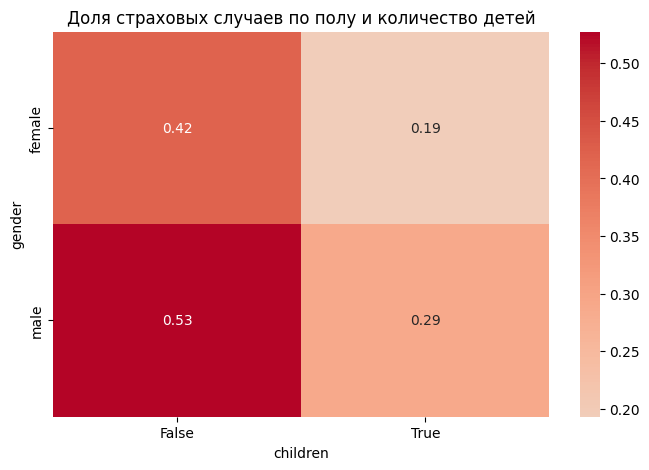

In [ ]:
gender_children = pd.pivot_table(data=df, index='gender', columns='children', values='outcome', aggfunc='mean')

plt.figure(figsize=[8, 5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Доля страховых случаев по полу и количество детей")
plt.show()

У мужчин без детей чаще всего возникают страховые случаи, а женщины с детьми – реже.

Коэффициент глобальной корреляции - это мера, выражающая общую корреляцию одной переменной со всеми остальными переменными в наборе данных. Это дает  представление о том, насколько хорошо одна переменная может быть смоделирована с помощью других переменных.

interval columns not set, guessing: ['credit_score', 'postal_code', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents']


/usr/local/lib/python3.10/dist-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


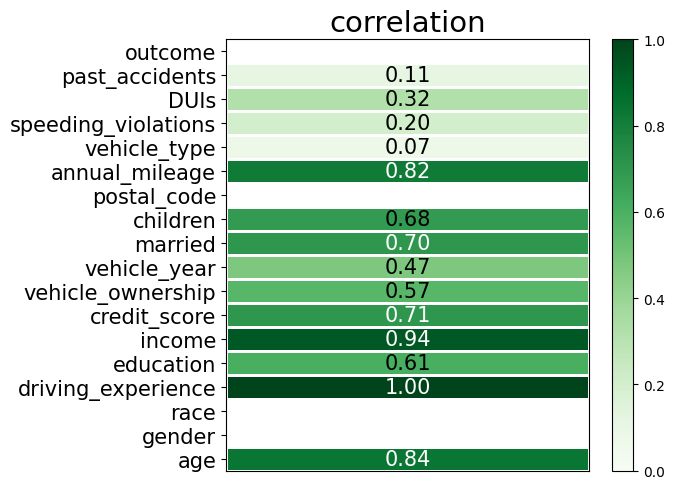

In [ ]:
global_correlation, global_labels = df.global_phik()

plot_correlation_matrix(global_correlation,
	                        x_labels=[''], y_labels=global_labels,
	                        vmin=0, vmax=1,
	                        color_map="Greens",
	                        fontsize_factor=1.5)
plt.tight_layout()

# Что ещё почитать?

- [Как изменить значение в зависимости от условия в Pandas](https://teletype.in/@pythontalk/change_value_pandas)
- [От широких датафреймов к длинным и обратно](https://teletype.in/@pythontalk/pivot_mellt_pandas)
- [Всё о методе shift()](https://teletype.in/@pythontalk/pandas_shift)
- [query и eval в pandas](https://teletype.in/@pythontalk/query_eval_pandas)